Contains functions for plotting data, including
- total calories per day
- total earnings per day
- average earnings by customer served per day.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# read from the csv and also convert string to list for future use
order_df = pd.read_csv('../data/order_df.csv', converters={'items': eval})

# calculate the price and calories of each day for the accepted orders
daily_sums = order_df[order_df['order_accepted'] == True].groupby('date')[['price', 'calories']].sum().reset_index()

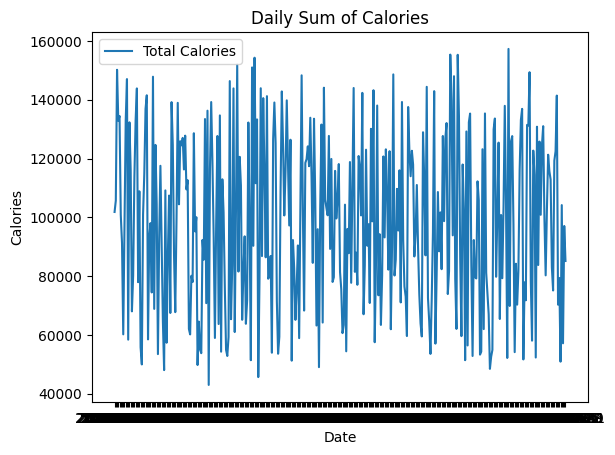

In [4]:
# create a plot to show "Total calories per day"
plt.plot(daily_sums['date'], daily_sums['calories'], label='Total Calories')
plt.title('Daily Sum of Calories')
plt.xlabel('Date')
plt.ylabel('Calories')
plt.legend()
plt.show()

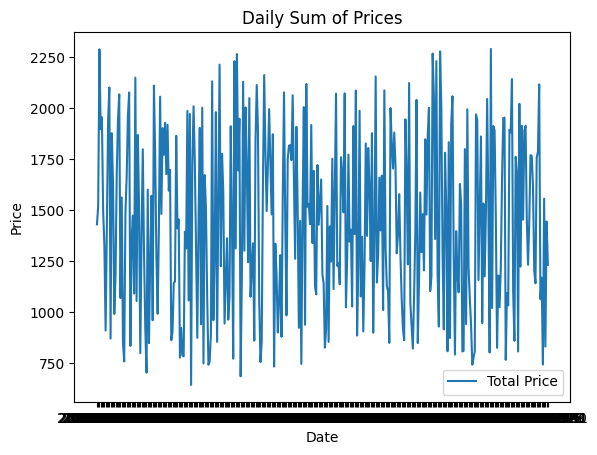

In [5]:
# create a plot to show "Total price per day"
plt.plot(daily_sums['date'], daily_sums['price'], label='Total Price')
plt.title('Daily Sum of Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

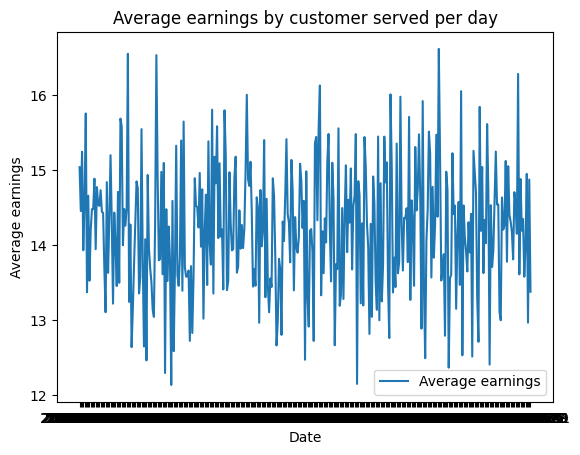

In [6]:
# create a plot to show "Average earnings by customer served per day"
daily_order_counts = order_df.groupby(order_df['date']).size().reset_index(name='order_count')

daily_data = pd.merge(daily_sums, daily_order_counts, on='date')

daily_data['average_earnings_per_order'] = daily_data['price'] / daily_data['order_count']

plt.plot(daily_data['date'], daily_data['average_earnings_per_order'], label='Average earnings')
plt.title('Average earnings by customer served per day')
plt.xlabel('Date')
plt.ylabel('Average earnings')
plt.legend()
plt.show()